# Customer Experience Enhancement through Personalized Recommendations

## (1)	Introduction:
In response to the evolving landscape of customer expectations, TechTrend Retail is embarking on a strategic initiative to leverage data science for enhancing the customer experience. This project focuses on eveloping and implementing a personalized recommendation system, utilizing advanced data science techniques to cater to individual customer preferences across both online and offline touchpoints.

## (2)	 About Company:
TechTrend Retail is a leading player in the consumer electronics industry, operating both online and through a network of physical stores. With a commitment to innovation and customer satisfaction, TechTrend Retail aims to provide a seamless and personalized shopping experience for its diverse customer base.

## (3)	 Problem Statement: 
In today's competitive retail landscape, TechTrend Retail recognizes the critical importance of delivering a personalized and engaging shopping experience to its customers. The company aims to everage data science methodologies to implement a robust recommendation system that tailors product suggestions and promotions to individual customer preferences across online and offline channels.

## (4)	 PROJECT OBJECTIVE:
- Enhanced Customer Experience: Develop a personalized recommendation system to provide customers with tailored product suggestions, promotions, and content, thereby enhancing their overall shopping experience.

- Increased Engagement: Increase customer engagement by delivering relevant and timely recommendations, fostering a deeper connection between customers and TechTrend Retail.

- Conversion Rate Optimization: Improve conversion rates by leveraging data-driven insights to guide customers toward purchases aligned with their preferences and behavior.

- Iterative Optimization: Establish a continuous improvement cycle by collecting feedback, analyzing performance metrics, and iteratively optimizing the recommendation engine.


## Questions
- What key segments can be found within the customer group and what are their characteristics?
- What demographic information is most relvant for segmenting customers?
- How can transaction history, interaction types, and customer profiles be used to create meaningful segments?
- What are the key features and characteristics of products that customers frequently purchase together?
- Are there seasonal or trending patterns that should be considered for personalization?
- What support system is most effective? How does support system influence purchase?
- What key performance indictors are mesuring success of the recommendation system?
- How do customer engagement metrics correlate with conversion rates and overall customer satisfaction?
- Are there leading indicators that can predict future success or challenges?


In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
pip install --upgrade imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import libraries
import pandas as pd # Data analysis
import numpy as np # Data analysis
import matplotlib.pyplot as plt # Data visualization
import seaborn as sns # Data visualization
from collections import Counter # Counting
import missingno as msno # Missing Data visualization

# Data Pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Classifier Libraries, which are Machine Learning algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Machine Learning and Evaluation
from sklearn.cluster import KMeans
#from sklearn.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, homogeneity_score

# Evaluaton metrics

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

# Data Preparation:

In [4]:
# Load datasets
customer = pd.read_csv(r"/Users/WaliNelson/Downloads/customer_data.csv")
trend = pd.read_csv(r"/Users/WaliNelson/Downloads/trend_sales_data.csv")
support = pd.read_csv(r"/Users/WaliNelson/Downloads/support_data.csv")

In [5]:
customer.head(5)

CustomerID FirstName   LastName  \
0  4bcf3918-facc-4b68-a4e8-311d341c192c    Thomas      Jones   
1  af020ffd-fe3a-4289-b78b-df5017217d5c   Brandon  Schneider   
2  cd570412-8832-4aca-bb85-cce6ea5a89cf  Patricia       Ross   
3  60c45917-0717-45aa-a9a6-064fc5704e82      Paul    Freeman   
4  7b2340ad-09b8-4426-ac14-f52162b8b9c9     Wyatt  Henderson   

                      Email                Phone  \
0     william13@example.org      +1-816-418-3473   
1      greenamy@example.com  (571)309-0994x93087   
2       laurali@example.net     389.463.6148x192   
3  martinezseth@example.com        (628)808-3804   
4    riveracody@example.org           9368801563   

                                             Address          City  \
0  533 Anna Plain Suite 304\nChristinashire, ND 5...    Nunezmouth   
1          79127 Donald Shoals\nMillertown, TN 49351  Mcmillantown   
2                   Unit 5325 Box 0191\nDPO AA 21670    New Ashley   
3  8385 Perry Street Apt. 213\nEast Elizabethbury...    New Angela   
4       75461 Clarke Center\nEast Samantha, CO 25506     Port Anne   

                            Country  
0  Lao People's Democratic Republic  
1                         Hong Kong  
2                             Japan  
3                     Faroe Islands  
4                             Egypt

In [6]:
trend.head(5)

TransactionID                            CustomerID  \
0  2dc00a50-5ed8-406b-b280-0f3c0f84c7f4  c102a925-e9e7-4112-a8ea-784e9a25bc6e   
1  1bf5a20f-fa2b-46ef-a954-abecbf2c539e  ff5f760f-49ed-4637-a8ce-cfeeec6c9887   
2  95632ef6-16ba-4693-b093-11771505fe34  5df22253-6b3c-4c68-b077-2e220c7575f0   
3  c4ddd6d8-6034-4ed1-98cb-9d029b1a9c13  b7e5880b-cb98-4013-813b-3c443e7cf37e   
4  6657e24d-18ee-4b30-8fed-b7a8f13cf42a  0d3c19d8-1379-455f-85ba-bb46d9520ca5   

      Product      Amount      TransactionDate  
0      Tablet  223.845603  2023-09-28 07:41:44  
1      Laptop  423.986960  2023-09-08 18:41:46  
2      Tablet   42.955398  2023-11-22 07:37:10  
3  Headphones  499.457380  2023-03-06 20:08:59  
4      Tablet  376.610117  2023-06-06 17:53:09

In [7]:
support.head(5)

InteractionID                            CustomerID  \
0  d15e050d-7d63-4c35-b6c7-a94ca4c37591  e40aaaca-f9b4-45eb-bc9b-99e48f2ed7b0   
1  fedad40e-fc8a-43a7-a2fb-42812a2a1e6f  80635f9a-f344-44a2-948f-fa761567c63f   
2  a86d4f6a-a3df-4c3b-97a5-5e3f68a5a9fd  dc7d551d-c991-4310-932f-7ce5b742e999   
3  d20f5780-9b10-4db7-93d9-27c882129024  eabb747a-6218-4e30-8035-557983ce5511   
4  cc02f330-7e41-477d-bf6d-5be3e24e49b5  29519f8f-782d-41fc-9f6a-79f28d13942d   

  InteractionType      InteractionDate  \
0            Chat  2023-07-17 21:34:27   
1      Phone Call  2023-11-14 08:19:42   
2      Phone Call  2023-12-18 16:25:29   
3      Phone Call  2023-04-18 15:16:06   
4            Chat  2023-02-19 15:35:03   

                                  InteractionContent  
0                          I need to return an item.  
1  I accidentally placed the wrong order. Can it ...  
2  The product manual is unclear, can you provide...  
3             I am experiencing issues with the app.  
4        The website is not working properly for me.

In [8]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  300 non-null    object
 1   FirstName   300 non-null    object
 2   LastName    300 non-null    object
 3   Email       300 non-null    object
 4   Phone       300 non-null    object
 5   Address     300 non-null    object
 6   City        300 non-null    object
 7   Country     300 non-null    object
dtypes: object(8)
memory usage: 18.9+ KB


In [9]:
trend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   Product          1000 non-null   object 
 3   Amount           1000 non-null   float64
 4   TransactionDate  1000 non-null   object 
dtypes: float64(1), object(4)
memory usage: 39.2+ KB


In [10]:
support.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   InteractionID       2000 non-null   object
 1   CustomerID          2000 non-null   object
 2   InteractionType     2000 non-null   object
 3   InteractionDate     2000 non-null   object
 4   InteractionContent  2000 non-null   object
dtypes: object(5)
memory usage: 78.3+ KB


In [11]:
trend.describe()

Amount
count  1000.000000
mean    247.492229
std     142.827527
min      10.091399
25%     122.337001
50%     243.431988
75%     371.743810
max     499.457380

# Data Visualizations

## Trend Data

In [12]:
# Convert the columns 'TransactionDate' to datetime format from the trend dataset
trend['TransactionDate'] = pd.to_datetime(trend['TransactionDate'])

# Convert the columns 'InteractionDate' to datetime format from the support dataset
support['InteractionDate'] = pd.to_datetime(support['InteractionDate'])

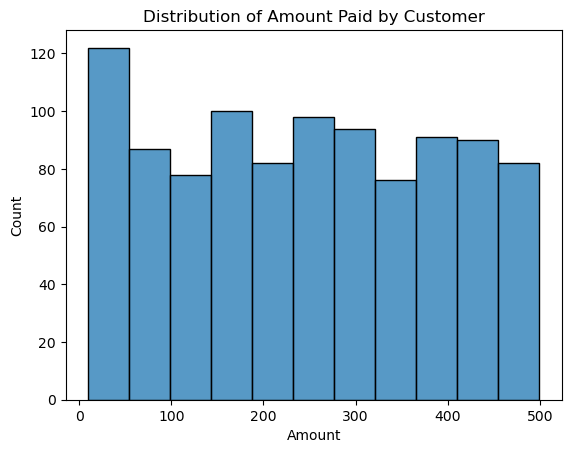

In [13]:
#Distribution of amount paid by customer
sns.histplot(data=trend, x='Amount')
plt.title('Distribution of Amount Paid by Customer');

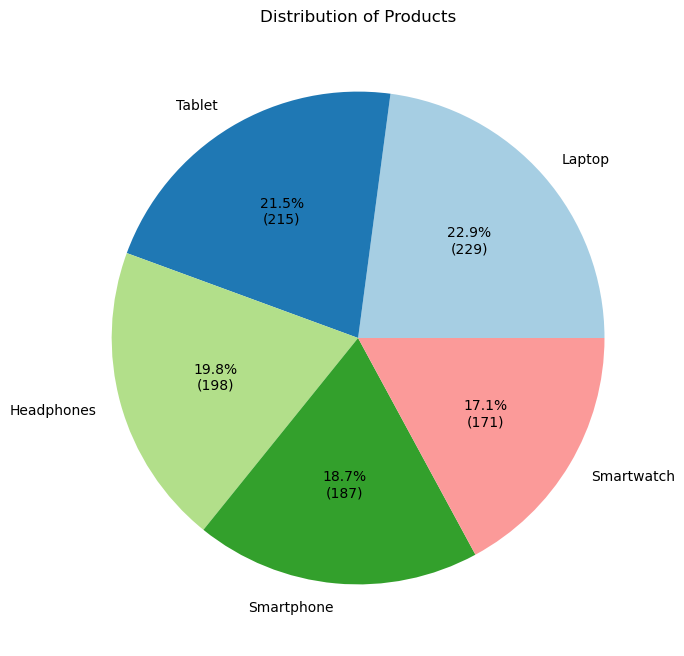

In [14]:
data = trend['Product'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
colors = plt.cm.Paired(range(len(data)))  # Choose your preferred color map

# Plotting the pie chart
plt.pie(data, labels=data.index, autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, p * sum(data) / 100), colors=colors)

plt.title('Distribution of Products')
plt.show()


## Observation:
The chart  shows the distribution of products sold. It appears to show the number of units sold for each product category. The total number of units sold is 1000, divided as follows:

 - Laptop: 229 units (22.9%)
 - Tablet: 215 units (21.5%)
 -  Headphones: 198 units (19.8%)
-  Smartphone: 187 units (18.7%)
-   Smartwatch: 171 units (17.1%)

Laptops are the most popular product, followed by Tablets and Headphones. Smartphones and Smartwatches are selling slightly less.

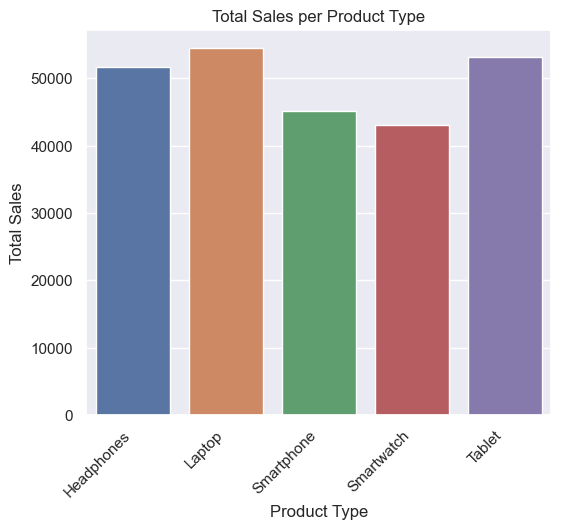

In [15]:
# Calculate total sales per product type
total_sales_per_product = trend.groupby('Product')['Amount'].sum()

sns.set(style="darkgrid")
plt.figure(figsize=(6, 5))
ax = sns.barplot(x=total_sales_per_product.index, y=total_sales_per_product.values)

plt.xlabel('Product Type')
plt.ylabel('Total Sales')
plt.title('Total Sales per Product Type')
plt.xticks(rotation=45, ha='right')
plt.show()


## Bivariate & Multivariate Analysis

In [16]:
new_sale = pd.merge(trend, customer[['CustomerID', 'City', 'Country']], how='left', on='CustomerID')
new_sale.head()

TransactionID                            CustomerID  \
0  2dc00a50-5ed8-406b-b280-0f3c0f84c7f4  c102a925-e9e7-4112-a8ea-784e9a25bc6e   
1  1bf5a20f-fa2b-46ef-a954-abecbf2c539e  ff5f760f-49ed-4637-a8ce-cfeeec6c9887   
2  95632ef6-16ba-4693-b093-11771505fe34  5df22253-6b3c-4c68-b077-2e220c7575f0   
3  c4ddd6d8-6034-4ed1-98cb-9d029b1a9c13  b7e5880b-cb98-4013-813b-3c443e7cf37e   
4  6657e24d-18ee-4b30-8fed-b7a8f13cf42a  0d3c19d8-1379-455f-85ba-bb46d9520ca5   

      Product      Amount     TransactionDate              City  \
0      Tablet  223.845603 2023-09-28 07:41:44        Baileystad   
1      Laptop  423.986960 2023-09-08 18:41:46    West Leahshire   
2      Tablet   42.955398 2023-11-22 07:37:10  Lake Williamport   
3  Headphones  499.457380 2023-03-06 20:08:59      East Cameron   
4      Tablet  376.610117 2023-06-06 17:53:09        Thomasbury   

                         Country  
0  Holy See (Vatican City State)  
1                          Benin  
2                   Cook Islands  
3                        Andorra  
4                         Taiwan

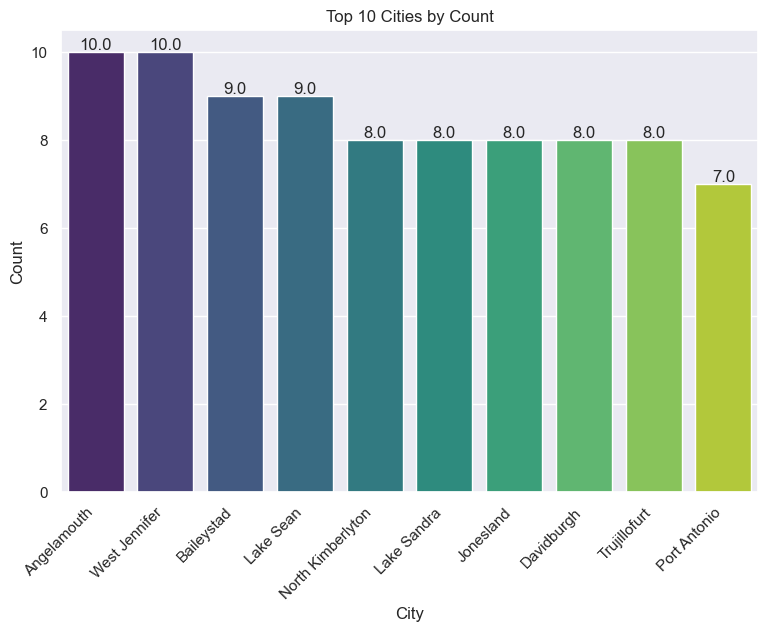

In [17]:
city_data = new_sale['City'].value_counts().sort_values(ascending=False).head(10)
plt.figure(figsize=(9, 6))
ax = sns.barplot(x=city_data.index, y=city_data.values, palette="viridis")

# Add labels and title
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Top 10 Cities by Count')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right');

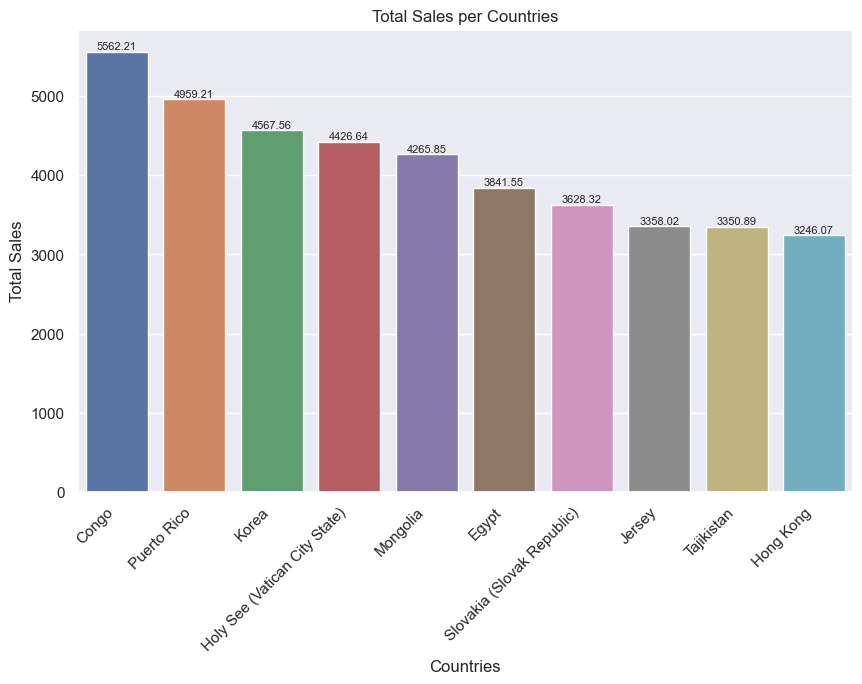

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate total sales per city
total_sales_per_country = new_sale.groupby('Country')['Amount'].sum().sort_values(ascending=False).head(10).reset_index()

sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=total_sales_per_city, x='Country', y='Amount')

plt.xlabel('Countries')
plt.ylabel('Total Sales')
plt.title('Total Sales per Countries')
plt.xticks(rotation=45, ha='right')

# Add counts on top of the bars
for i, v in enumerate(total_sales_per_country['Amount']):
    ax.text(i, v + 0.5, str(round(v, 2)), ha='center', va='bottom', fontsize=8)

plt.show()


## Observation
- The top ten countries in terms of total sales are Congo, Puerto Rico, Korea, Holy See (Vatican City State), Mongolia, Egypt, Slovakia, Jersey, Tajikistan, and Hong Kong.
- Congo has the highest total sales, followed by Puerto Rico and Korea.
- There is a significant gap between the top three countries and the rest.

In [19]:
#Extract the time-based features
new_sale['Year'] = new_sale['TransactionDate'].dt.year
new_sale['Month'] = new_sale['TransactionDate'].dt.month
new_sale['Month_Name'] = new_sale['TransactionDate'].dt.month_name()
new_sale['Quarter'] = new_sale['TransactionDate'].dt.quarter
new_sale['Time'] = new_sale['TransactionDate'].dt.time

In [20]:
new_sale.head(2)

TransactionID                            CustomerID  \
0  2dc00a50-5ed8-406b-b280-0f3c0f84c7f4  c102a925-e9e7-4112-a8ea-784e9a25bc6e   
1  1bf5a20f-fa2b-46ef-a954-abecbf2c539e  ff5f760f-49ed-4637-a8ce-cfeeec6c9887   

  Product      Amount     TransactionDate            City  \
0  Tablet  223.845603 2023-09-28 07:41:44      Baileystad   
1  Laptop  423.986960 2023-09-08 18:41:46  West Leahshire   

                         Country  Year  Month Month_Name  Quarter      Time  
0  Holy See (Vatican City State)  2023      9  September        3  07:41:44  
1                          Benin  2023      9  September        3  18:41:46

In [21]:
def get_time_of_day(x):
    if x >= pd.to_datetime('00:00:00').time() and x < pd.to_datetime('07:00:00').time():
        return 'Night'
    elif x >= pd.to_datetime('07:00:00').time() and x < pd.to_datetime('12:00:00').time():
        return 'Morning'
    elif x >= pd.to_datetime('12:00:00').time() and x < pd.to_datetime('18:00:00').time():
        return 'Afternoon'
    elif x >= pd.to_datetime('18:00:00').time() and x <= pd.to_datetime('23:59:59').time():
        return 'Evening'
    else:
        return 'Dawn'


new_sale['Day_Period'] = new_sale['Time'].apply(get_time_of_day)
new_sale.head(3)


TransactionID                            CustomerID  \
0  2dc00a50-5ed8-406b-b280-0f3c0f84c7f4  c102a925-e9e7-4112-a8ea-784e9a25bc6e   
1  1bf5a20f-fa2b-46ef-a954-abecbf2c539e  ff5f760f-49ed-4637-a8ce-cfeeec6c9887   
2  95632ef6-16ba-4693-b093-11771505fe34  5df22253-6b3c-4c68-b077-2e220c7575f0   

  Product      Amount     TransactionDate              City  \
0  Tablet  223.845603 2023-09-28 07:41:44        Baileystad   
1  Laptop  423.986960 2023-09-08 18:41:46    West Leahshire   
2  Tablet   42.955398 2023-11-22 07:37:10  Lake Williamport   

                         Country  Year  Month Month_Name  Quarter      Time  \
0  Holy See (Vatican City State)  2023      9  September        3  07:41:44   
1                          Benin  2023      9  September        3  18:41:46   
2                   Cook Islands  2023     11   November        4  07:37:10   

  Day_Period  
0    Morning  
1    Evening  
2    Morning

In [22]:
Monthly_sale = new_sale.groupby('Month_Name')['Amount'].mean().sort_values(ascending = False)
Monthly_sale

Month_Name
March        267.998524
May          256.840351
June         256.816989
November     254.031060
October      252.409973
July         252.360971
December     250.031070
September    239.892098
January      237.966300
August       236.593167
April        233.275385
February     230.138210
Name: Amount, dtype: float64

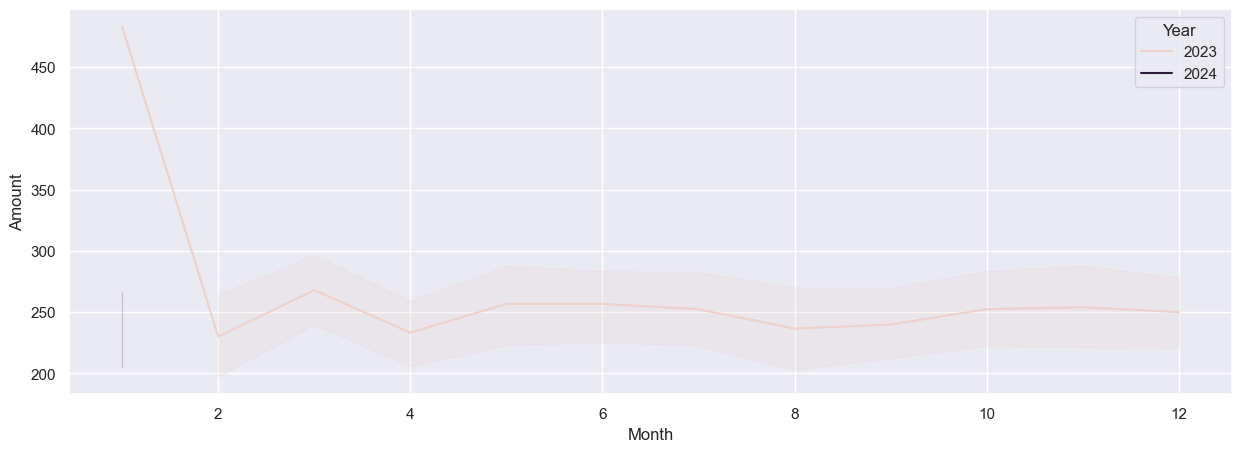

In [23]:
plt.figure(figsize=(15,5))
ax= sns.lineplot(x = 'Month', y = 'Amount', data = new_sale, hue = 'Year')

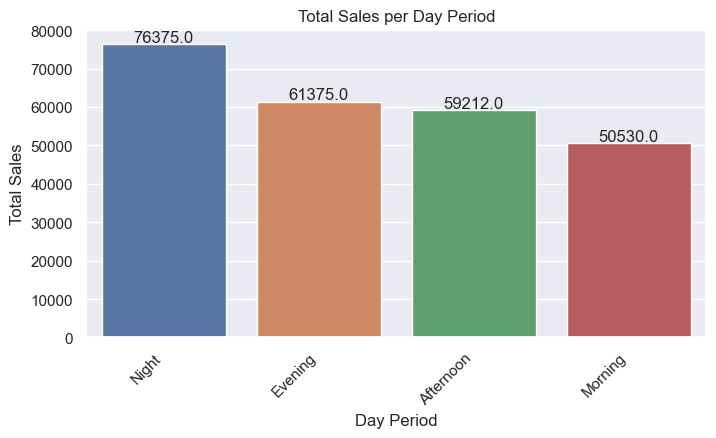

In [24]:
# Calculate total sales per time of the day
total_sales_per_day_time = round(new_sale.groupby('Day_Period')['Amount'].sum().sort_values(ascending=False).reset_index(),0)
total_sales_per_day_time  

sns.set(style="darkgrid")
plt.figure(figsize=(8, 4))
ax = sns.barplot( data = total_sales_per_day_time , x='Day_Period', y='Amount')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')


plt.xlabel('Day Period')
plt.ylabel('Total Sales')
plt.title('Total Sales per Day Period')
plt.xticks(rotation=45, ha='right')
plt.show()

In [25]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [26]:
import geopandas as gpd
from shapely.geometry import Point

# Load the country-continent mapping dataset
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

pop_est      continent                      name iso_a3  gdp_md_est  \
0     889953.0        Oceania                      Fiji    FJI        5496   
1   58005463.0         Africa                  Tanzania    TZA       63177   
2     603253.0         Africa                 W. Sahara    ESH         907   
3   37589262.0  North America                    Canada    CAN     1736425   
4  328239523.0  North America  United States of America    USA    21433226   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...

In [27]:
new_sale.head()

TransactionID                            CustomerID  \
0  2dc00a50-5ed8-406b-b280-0f3c0f84c7f4  c102a925-e9e7-4112-a8ea-784e9a25bc6e   
1  1bf5a20f-fa2b-46ef-a954-abecbf2c539e  ff5f760f-49ed-4637-a8ce-cfeeec6c9887   
2  95632ef6-16ba-4693-b093-11771505fe34  5df22253-6b3c-4c68-b077-2e220c7575f0   
3  c4ddd6d8-6034-4ed1-98cb-9d029b1a9c13  b7e5880b-cb98-4013-813b-3c443e7cf37e   
4  6657e24d-18ee-4b30-8fed-b7a8f13cf42a  0d3c19d8-1379-455f-85ba-bb46d9520ca5   

      Product      Amount     TransactionDate              City  \
0      Tablet  223.845603 2023-09-28 07:41:44        Baileystad   
1      Laptop  423.986960 2023-09-08 18:41:46    West Leahshire   
2      Tablet   42.955398 2023-11-22 07:37:10  Lake Williamport   
3  Headphones  499.457380 2023-03-06 20:08:59      East Cameron   
4      Tablet  376.610117 2023-06-06 17:53:09        Thomasbury   

                         Country  Year  Month Month_Name  Quarter      Time  \
0  Holy See (Vatican City State)  2023      9  September        3  07:41:44   
1                          Benin  2023      9  September        3  18:41:46   
2                   Cook Islands  2023     11   November        4  07:37:10   
3                        Andorra  2023      3      March        1  20:08:59   
4                         Taiwan  2023      6       June        2  17:53:09   

  Day_Period  
0    Morning  
1    Evening  
2    Morning  
3    Evening  
4  Afternoon

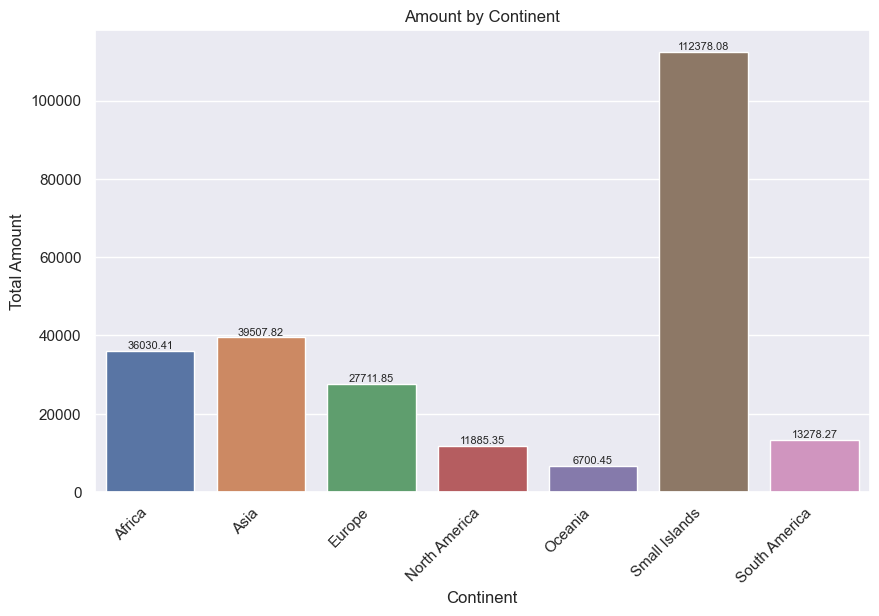

In [83]:
# Merge your DataFrame with the country-continent mapping dataset
continent_df = pd.merge(new_sale, world[['name', 'continent']], left_on='Country', right_on='name', how='left')
continent_df['continent'] = continent_df['continent'].fillna('Small Islands')

# Plot the results
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='continent', y='Amount', data=continent_df.groupby('continent')['Amount'].sum().reset_index())

plt.title('Amount by Continent')
plt.xlabel('Continent')
plt.ylabel('Total Amount')
plt.xticks(rotation=45, ha='right')

# Add counts on top of the bars
for i, v in enumerate(continent_df.groupby('continent')['Amount'].sum().values):
    ax.text(i, v + 0.5, str(round(v, 2)), ha='center', va='bottom', fontsize=8)

plt.show()


## Observation
- Small Islands has the highest total amount: With a value of 112,378.08, Small Islands significantly outperforms all other continents in terms of total amount.
- Asia and Africa follow closely: Asia's total amount is 39,507.82, and Africa's is 36,030.41, indicating they contribute considerably to the overall sales, although not to the same extent as Small Islands.
- Europe, North America, and South America have lower amounts: These continents have total amounts ranging from 11,885.35 (North America) to 27,711.85 (Europe).
- Oceania has the lowest amount: With a total amount of 6,700.45, Oceania seems to have the least contribution compared to the other continents.

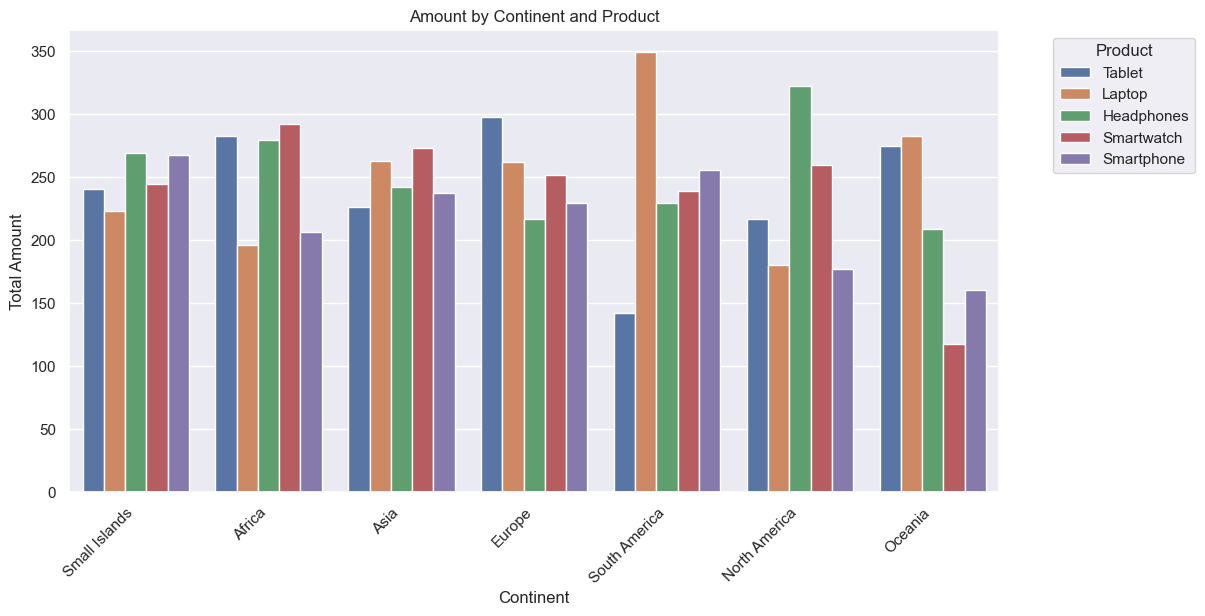

In [84]:
# Merge your DataFrame with the country-continent mapping dataset
continent_df = pd.merge(new_sale, world[['name', 'continent']], left_on='Country', right_on='name', how='left')
continent_df['continent'] = continent_df['continent'].fillna('Small Islands')

# Plot the results with Product as hue
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='continent', y='Amount', hue='Product', data=continent_df, ci=None)

plt.title('Amount by Continent and Product')
plt.xlabel('Continent')
plt.ylabel('Total Amount')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


In [29]:
continent_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   Product          1000 non-null   object        
 3   Amount           1000 non-null   float64       
 4   TransactionDate  1000 non-null   datetime64[ns]
 5   City             1000 non-null   object        
 6   Country          1000 non-null   object        
 7   Year             1000 non-null   int64         
 8   Month            1000 non-null   int64         
 9   Month_Name       1000 non-null   object        
 10  Quarter          1000 non-null   int64         
 11  Time             1000 non-null   object        
 12  Day_Period       1000 non-null   object        
 13  name             547 non-null    object        
 14  continent        1000 non-null   object  

In [30]:
new_sale.head()

TransactionID                            CustomerID  \
0  2dc00a50-5ed8-406b-b280-0f3c0f84c7f4  c102a925-e9e7-4112-a8ea-784e9a25bc6e   
1  1bf5a20f-fa2b-46ef-a954-abecbf2c539e  ff5f760f-49ed-4637-a8ce-cfeeec6c9887   
2  95632ef6-16ba-4693-b093-11771505fe34  5df22253-6b3c-4c68-b077-2e220c7575f0   
3  c4ddd6d8-6034-4ed1-98cb-9d029b1a9c13  b7e5880b-cb98-4013-813b-3c443e7cf37e   
4  6657e24d-18ee-4b30-8fed-b7a8f13cf42a  0d3c19d8-1379-455f-85ba-bb46d9520ca5   

      Product      Amount     TransactionDate              City  \
0      Tablet  223.845603 2023-09-28 07:41:44        Baileystad   
1      Laptop  423.986960 2023-09-08 18:41:46    West Leahshire   
2      Tablet   42.955398 2023-11-22 07:37:10  Lake Williamport   
3  Headphones  499.457380 2023-03-06 20:08:59      East Cameron   
4      Tablet  376.610117 2023-06-06 17:53:09        Thomasbury   

                         Country  Year  Month Month_Name  Quarter      Time  \
0  Holy See (Vatican City State)  2023      9  September        3  07:41:44   
1                          Benin  2023      9  September        3  18:41:46   
2                   Cook Islands  2023     11   November        4  07:37:10   
3                        Andorra  2023      3      March        1  20:08:59   
4                         Taiwan  2023      6       June        2  17:53:09   

  Day_Period  
0    Morning  
1    Evening  
2    Morning  
3    Evening  
4  Afternoon

In [31]:
experience = pd.merge(new_sale, continent_df[['CustomerID', 'name', 'continent']], how='left', on='CustomerID')
experience.head()

TransactionID                            CustomerID  \
0  2dc00a50-5ed8-406b-b280-0f3c0f84c7f4  c102a925-e9e7-4112-a8ea-784e9a25bc6e   
1  2dc00a50-5ed8-406b-b280-0f3c0f84c7f4  c102a925-e9e7-4112-a8ea-784e9a25bc6e   
2  2dc00a50-5ed8-406b-b280-0f3c0f84c7f4  c102a925-e9e7-4112-a8ea-784e9a25bc6e   
3  2dc00a50-5ed8-406b-b280-0f3c0f84c7f4  c102a925-e9e7-4112-a8ea-784e9a25bc6e   
4  2dc00a50-5ed8-406b-b280-0f3c0f84c7f4  c102a925-e9e7-4112-a8ea-784e9a25bc6e   

  Product      Amount     TransactionDate        City  \
0  Tablet  223.845603 2023-09-28 07:41:44  Baileystad   
1  Tablet  223.845603 2023-09-28 07:41:44  Baileystad   
2  Tablet  223.845603 2023-09-28 07:41:44  Baileystad   
3  Tablet  223.845603 2023-09-28 07:41:44  Baileystad   
4  Tablet  223.845603 2023-09-28 07:41:44  Baileystad   

                         Country  Year  Month Month_Name  Quarter      Time  \
0  Holy See (Vatican City State)  2023      9  September        3  07:41:44   
1  Holy See (Vatican City State)  2023      9  September        3  07:41:44   
2  Holy See (Vatican City State)  2023      9  September        3  07:41:44   
3  Holy See (Vatican City State)  2023      9  September        3  07:41:44   
4  Holy See (Vatican City State)  2023      9  September        3  07:41:44   

  Day_Period name      continent  
0    Morning  NaN  Small Islands  
1    Morning  NaN  Small Islands  
2    Morning  NaN  Small Islands  
3    Morning  NaN  Small Islands  
4    Morning  NaN  Small Islands

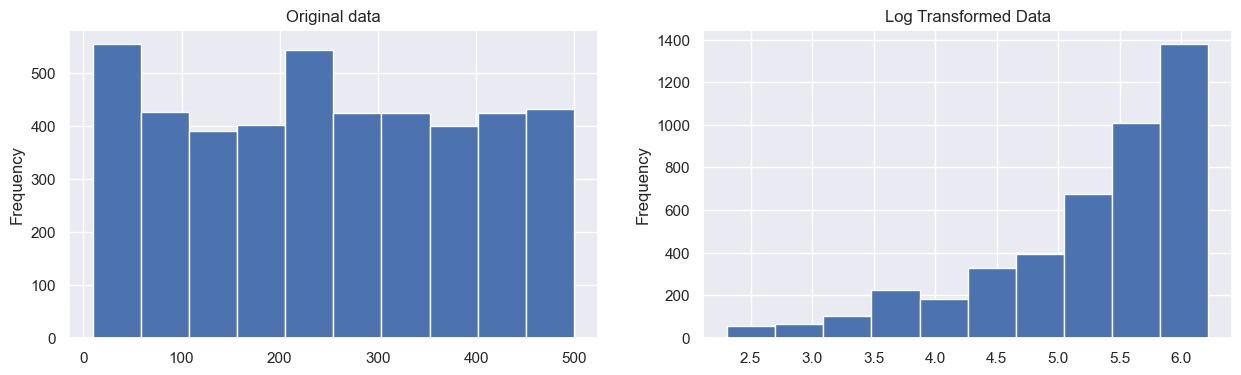

In [32]:
# Log Transform data
experience['Amount_log'] = np.log(experience['Amount'])

# Create axis for original data plot (ax1) and transformed data (ax2)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,4));

# Plot original data 
experience['Amount'].plot(kind='hist', ax=ax1)
ax1.title.set_text('Original data')


# Plot log transformed data 
experience['Amount_log'].plot(kind='hist', ax=ax2);
ax2.title.set_text('Log Transformed Data')

#### Dropping unneccessary columns before encoding

In [33]:
exp = experience.drop(['TransactionID', 'CustomerID', 'TransactionDate',
       'City', 'Year', 'Month', 'Month_Name', 'Quarter', 'Time', 'Country','name', 'Amount_log'], axis = 1)
exp.head()

Product      Amount Day_Period      continent
0  Tablet  223.845603    Morning  Small Islands
1  Tablet  223.845603    Morning  Small Islands
2  Tablet  223.845603    Morning  Small Islands
3  Tablet  223.845603    Morning  Small Islands
4  Tablet  223.845603    Morning  Small Islands

In [34]:
exp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4412 entries, 0 to 4411
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     4412 non-null   object 
 1   Amount      4412 non-null   float64
 2   Day_Period  4412 non-null   object 
 3   continent   4412 non-null   object 
dtypes: float64(1), object(3)
memory usage: 172.3+ KB


#### Encoding Categorical Features:
Convert categorical variables into numerical representations for the categorical columns.

In [35]:
exp['Product'].unique()

array(['Tablet', 'Laptop', 'Headphones', 'Smartwatch', 'Smartphone'],
      dtype=object)

In [36]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Fit and transform the column
exp['Product'] = label_encoder.fit_transform(exp['Product'])


In [37]:
exp['Product'].unique()

array([4, 1, 0, 3, 2])

Tablet = 4, Laptop = 1, Headphones = 0, Smartwatch = 3, Smartphone = 2

In [38]:
exp['Day_Period'].unique()

array(['Morning', 'Evening', 'Afternoon', 'Night'], dtype=object)

In [39]:
label_encoder = LabelEncoder()

# Fit and transform the column
exp['Day_Period'] = label_encoder.fit_transform(exp['Day_Period'])


In [40]:
exp['Day_Period'].unique()

array([2, 1, 0, 3])

Morning = 2, Evening = 1, Afternoon = 0, Night = 3

In [41]:
exp['continent'].unique()

array(['Small Islands', 'Africa', 'Asia', 'Europe', 'South America',
       'North America', 'Oceania'], dtype=object)

In [42]:
label_encoder = LabelEncoder()

# Fit and transform the column
exp['continent'] = label_encoder.fit_transform(exp['continent'])


In [43]:
exp['continent'].unique()

array([5, 0, 1, 2, 6, 3, 4])

Small Islands = 5, 'Africa' = 0, 'Asia' = 1, 'Europe' = 2, 'South America' = 6, 'North America' = 3, 'Oceania' = 4

In [44]:
exp.head()

Product      Amount  Day_Period  continent
0        4  223.845603           2          5
1        4  223.845603           2          5
2        4  223.845603           2          5
3        4  223.845603           2          5
4        4  223.845603           2          5

In [45]:
# Create a copy to avoid modifying the original encoded DataFrame
normalized_data = exp.copy()

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize the selected numerical columns
X = scaler.fit_transform(normalized_data)

# K-Means Clustering

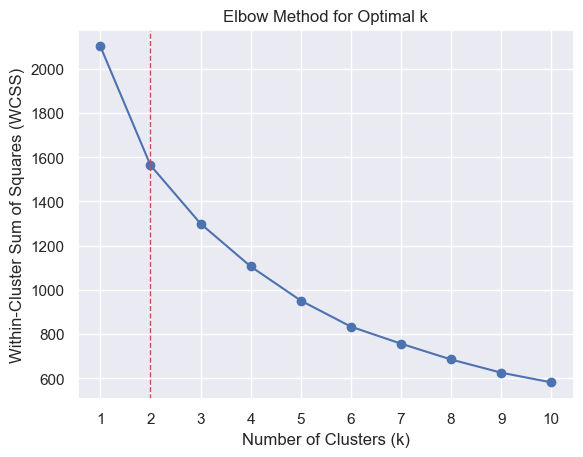

Elbow point (Optimal k): 2


In [46]:
# Define the range of clusters to try
k_range = range(1, 11)  # Trying clusters from 1 to 10

# Calculate the within-cluster sum of squares (WCSS) for each k
wcss = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_range, wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')

# Find the elbow point (the point with maximum curvature)
delta_wcss = np.diff(wcss)
curvature = np.diff(delta_wcss)
elbow_point = k_range[np.argmax(curvature) + 1]

# Plot a straight line at the elbow point
plt.axvline(x=elbow_point, color='r', linestyle='--', linewidth=1)
plt.xticks(np.arange(1, 11, 1))  # Adjust x-axis ticks
plt.grid(True)
plt.show()

print("Elbow point (Optimal k):", elbow_point)


### Though the model suggested 2 clusters as optimal, I will go with 3 clusters

#### Principal Component Analysis (PCA)

In [47]:
from sklearn.decomposition import PCA


pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X)
X_pca_df = pd.DataFrame(data=X_pca, columns=['X1', 'X2', 'X3'])

In [48]:
#Applying K-Means with 3 clusters and visualizing the results with PCA decomposition
kmeans=KMeans(n_clusters=3, random_state=0).fit(X)  

In [49]:
labels = kmeans.labels_
X_pca_df['Cluster'] = labels
X_pca_df.head()

X1        X2        X3  Cluster
0 -0.214751 -0.533565 -0.140874        2
1 -0.214751 -0.533565 -0.140874        2
2 -0.214751 -0.533565 -0.140874        2
3 -0.214751 -0.533565 -0.140874        2
4 -0.214751 -0.533565 -0.140874        2

In [50]:
import plotly.express as px

fig = px.scatter_3d(X_pca_df, x='X1', y='X2', z='X3',
              color=X_pca_df['Cluster'])
fig.show()

#### Fitting K-Means clustering model with optimal number of clusters

In [51]:
optimal_num_clusters = 3

# Fit K-Means clustering model with optimal number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_num_clusters, random_state=42, n_init=10)
normalized_data['Cluster'] = kmeans_optimal.fit_predict(X)

# Display the DataFrame with assigned clusters
normalized_data.head()

Product      Amount  Day_Period  continent  Cluster
0        4  223.845603           2          5        0
1        4  223.845603           2          5        0
2        4  223.845603           2          5        0
3        4  223.845603           2          5        0
4        4  223.845603           2          5        0

#### Interpretations and Visualizations

In [52]:
summary = {}

for index in range(3):
    summary[index] = normalized_data[normalized_data['Cluster'] == index].describe().T 

In [53]:
summary[0]

count        mean         std        min         25%         50%  \
Product     1295.0    2.151351    1.454709   0.000000    1.000000    2.000000   
Amount      1295.0  247.411052  142.221272  10.307483  120.082125  234.970771   
Day_Period  1295.0    2.602317    0.489608   2.000000    2.000000    3.000000   
continent   1295.0    4.906564    0.611390   3.000000    5.000000    5.000000   
Cluster     1295.0    0.000000    0.000000   0.000000    0.000000    0.000000   

                   75%         max  
Product       4.000000    4.000000  
Amount      377.431366  498.485517  
Day_Period    3.000000    3.000000  
continent     5.000000    6.000000  
Cluster       0.000000    0.000000

In [54]:
summary[1]

count        mean         std        min         25%         50%  \
Product     1322.0    1.916793    1.386331   0.000000    1.000000    2.000000   
Amount      1322.0  254.497979  137.991162  11.539044  134.695852  247.966964   
Day_Period  1322.0    2.157337    0.810264   1.000000    1.000000    2.000000   
continent   1322.0    0.903933    0.812841   0.000000    0.000000    1.000000   
Cluster     1322.0    1.000000    0.000000   1.000000    1.000000    1.000000   

                   75%         max  
Product       3.000000    4.000000  
Amount      369.602734  498.150002  
Day_Period    3.000000    3.000000  
continent     1.000000    3.000000  
Cluster       1.000000    1.000000

In [55]:
summary[2]

count        mean         std        min         25%       50%  \
Product     1795.0    1.977159    1.404338   0.000000    1.000000    2.0000   
Amount      1795.0  244.413216  146.267067  10.091399  112.748236  242.9831   
Day_Period  1795.0    0.397214    0.489457   0.000000    0.000000    0.0000   
continent   1795.0    3.890808    1.776629   0.000000    2.000000    5.0000   
Cluster     1795.0    2.000000    0.000000   2.000000    2.000000    2.0000   

                   75%        max  
Product       3.000000    4.00000  
Amount      370.113665  499.45738  
Day_Period    1.000000    1.00000  
continent     5.000000    6.00000  
Cluster       2.000000    2.00000

##### Cluster distribution

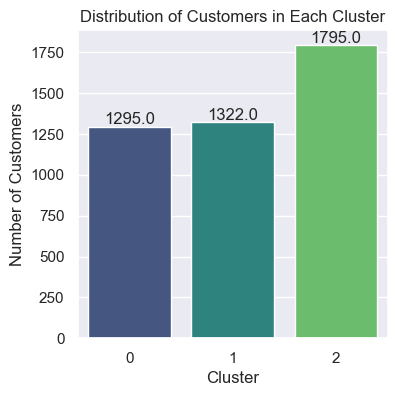

In [56]:
plt.figure(figsize=(4, 4))
ax=sns.countplot(x='Cluster', data=normalized_data, palette='viridis')
plt.title('Distribution of Customers in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()



#### The Cluster 2 (above) is most populated

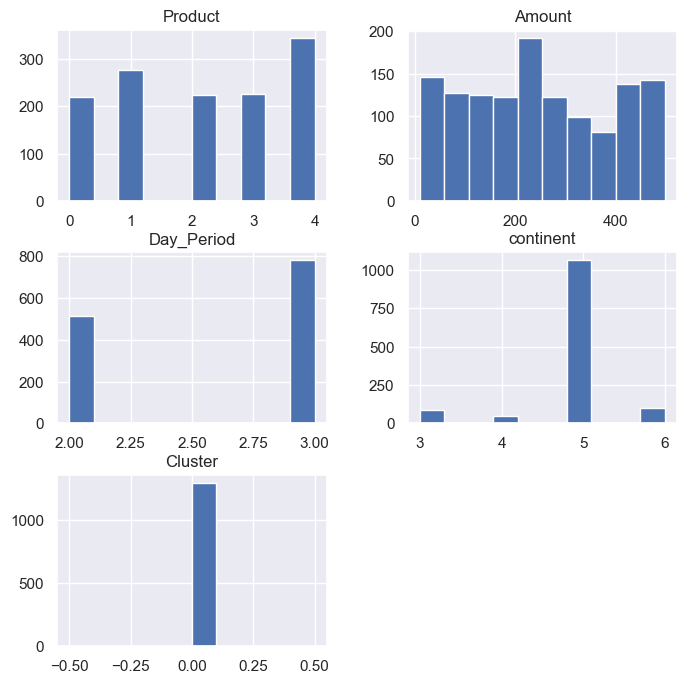

In [57]:
normalized_data[normalized_data['Cluster'] == 0].hist(figsize=(8,8));

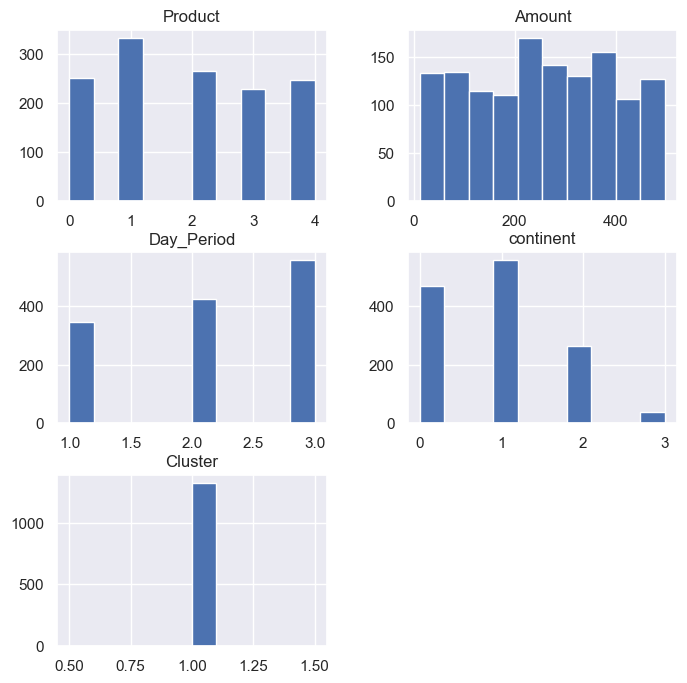

In [58]:
normalized_data[normalized_data['Cluster'] == 1].hist(figsize=(8,8));

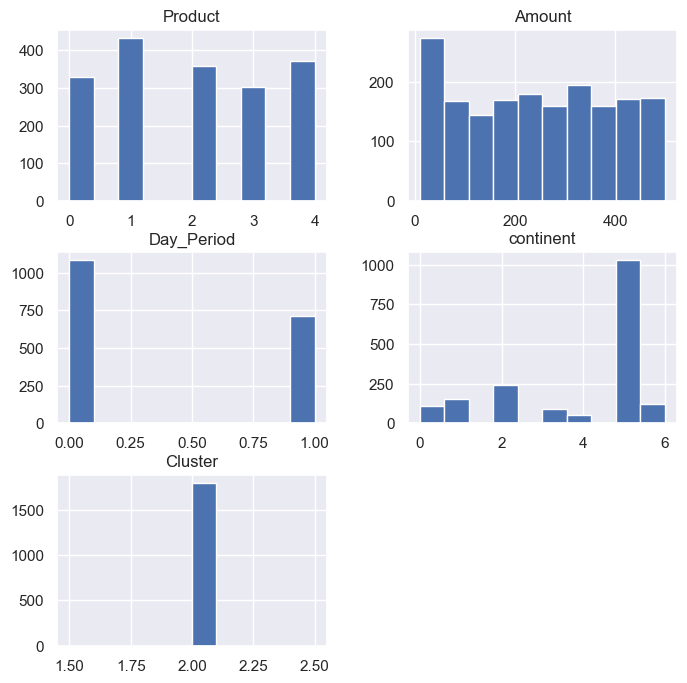

In [59]:
normalized_data[normalized_data['Cluster'] == 2].hist(figsize=(8,8));

## Observations from The Clusters

# Collaborative Filtering Recommendation System

In [60]:
experience.head(1)

TransactionID                            CustomerID  \
0  2dc00a50-5ed8-406b-b280-0f3c0f84c7f4  c102a925-e9e7-4112-a8ea-784e9a25bc6e   

  Product      Amount     TransactionDate        City  \
0  Tablet  223.845603 2023-09-28 07:41:44  Baileystad   

                         Country  Year  Month Month_Name  Quarter      Time  \
0  Holy See (Vatican City State)  2023      9  September        3  07:41:44   

  Day_Period name      continent  Amount_log  
0    Morning  NaN  Small Islands    5.410957

In [61]:
recommend = experience.drop(['TransactionID', 'Amount', 'TransactionDate', 'Day_Period',
       'City', 'Year', 'Month', 'Month_Name', 'Quarter', 'Time', 'Country','name', 'Amount_log'], axis = 1)
recommend.head()

CustomerID Product      continent
0  c102a925-e9e7-4112-a8ea-784e9a25bc6e  Tablet  Small Islands
1  c102a925-e9e7-4112-a8ea-784e9a25bc6e  Tablet  Small Islands
2  c102a925-e9e7-4112-a8ea-784e9a25bc6e  Tablet  Small Islands
3  c102a925-e9e7-4112-a8ea-784e9a25bc6e  Tablet  Small Islands
4  c102a925-e9e7-4112-a8ea-784e9a25bc6e  Tablet  Small Islands

In [62]:
label_encoder = LabelEncoder()

recommend['Product'] = label_encoder.fit_transform(exp['Product'])

In [63]:
recommend['Product'].unique()

array([4, 1, 0, 3, 2])

Tablet = 4, Laptop = 1, Headphones = 0, Smartwatch = 3, Smartphone = 2
1

In [64]:
label_encoder = LabelEncoder()
recommend['Day_Period'] = label_encoder.fit_transform(exp['Day_Period'])

In [65]:
recommend['Day_Period'].unique()

array([2, 1, 0, 3])

Morning = 2, Evening = 1, Afternoon = 0, Night = 3

In [66]:
label_encoder = LabelEncoder()
recommend['continent'] = label_encoder.fit_transform(exp['continent'])

In [67]:
recommend['continent'].unique()

array([5, 0, 1, 2, 6, 3, 4])

Small Islands = 5, 'Africa' = 0, 'Asia' = 1, 'Europe' = 2, 'South America' = 6, 'North America' = 3, 'Oceania' = 4

In [68]:
recommend.head(20)

CustomerID  Product  continent  Day_Period
0   c102a925-e9e7-4112-a8ea-784e9a25bc6e        4          5           2
1   c102a925-e9e7-4112-a8ea-784e9a25bc6e        4          5           2
2   c102a925-e9e7-4112-a8ea-784e9a25bc6e        4          5           2
3   c102a925-e9e7-4112-a8ea-784e9a25bc6e        4          5           2
4   c102a925-e9e7-4112-a8ea-784e9a25bc6e        4          5           2
5   c102a925-e9e7-4112-a8ea-784e9a25bc6e        4          5           2
6   c102a925-e9e7-4112-a8ea-784e9a25bc6e        4          5           2
7   c102a925-e9e7-4112-a8ea-784e9a25bc6e        4          5           2
8   c102a925-e9e7-4112-a8ea-784e9a25bc6e        4          5           2
9   ff5f760f-49ed-4637-a8ce-cfeeec6c9887        1          0           1
10  ff5f760f-49ed-4637-a8ce-cfeeec6c9887        1          0           1
11  5df22253-6b3c-4c68-b077-2e220c7575f0        4          5           2
12  5df22253-6b3c-4c68-b077-2e220c7575f0        4          5           2
13  5df22253-6b3c-4c68-b077-2e220c7575f0        4          5           2
14  5df22253-6b3c-4c68-b077-2e220c7575f0        4          5           2
15  5df22253-6b3c-4c68-b077-2e220c7575f0        4          5           2
16  5df22253-6b3c-4c68-b077-2e220c7575f0        4          5           2
17  b7e5880b-cb98-4013-813b-3c443e7cf37e        0          5           1
18  b7e5880b-cb98-4013-813b-3c443e7cf37e        0          5           1
19  b7e5880b-cb98-4013-813b-3c443e7cf37e        0          5           1

In [69]:
pip install scikit-surprise

Note: you may need to restart the kernel to use updated packages.


In [70]:
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import train_test_split
from surprise import SVD
from surprise import SVDpp
from surprise import accuracy

In [71]:
train_data = Dataset.load_from_df(recommend[['CustomerID','continent','Product']], Reader(rating_scale=(0, 5)))

In [72]:
# Create a Surprise Reader with the specified rating scale
reader = Reader(rating_scale=(0, 5))

# Load the data into Surprise Dataset
train_data = Dataset.load_from_df(recommend[['CustomerID', 'continent', 'Product']], reader)

# Split the dataset into train and test sets
trainset, testset = train_test_split(train_data, test_size=0.05)

In [73]:
#SVDpp model
svdpp=SVDpp(n_epochs = 30, n_factors = 200, init_std_dev = 0.05, random_state=42)

#Fitting the model
svdpp.fit(trainset)

# Making prediction on the validation dataset
test_pred= svdpp.test(testset)

#Evaluating model performance


In [74]:
svd = SVD(n_factors=160, lr_all=0.0085, reg_all=0.02,n_epochs=20,init_std_dev=0.01)

In [75]:
#Fitting the model
svd.fit(trainset)

# Making prediction on the validation dataset
svd_test_pred= svd.test(testset)

In [76]:
rsme_svd = accuracy.rmse(svd_test_pred, verbose=True)

RMSE: 1.3578


In [77]:
pred_svd = [svd.predict(row.CustomerID, row.continent) for idx,row in recommend.iterrows()]

In [78]:
svd_pred_df = pd.DataFrame(pred_svd)
svd_pred_df = svd_pred_df.rename(columns={'est':'Product'})
svd_pred_df['Id']=svd_pred_df['uid'].astype(str) + '_' + svd_pred_df['iid'].astype(str)
svd_submission_df = svd_pred_df[['Id','Product']]
svd_submission_df.head()

Id   Product
0  c102a925-e9e7-4112-a8ea-784e9a25bc6e_5  2.713674
1  c102a925-e9e7-4112-a8ea-784e9a25bc6e_5  2.713674
2  c102a925-e9e7-4112-a8ea-784e9a25bc6e_5  2.713674
3  c102a925-e9e7-4112-a8ea-784e9a25bc6e_5  2.713674
4  c102a925-e9e7-4112-a8ea-784e9a25bc6e_5  2.713674

# Deployment

## 1. Model Serialization 
Save the trained SVD model to a file. This process is often referred to as serialization. In Python, you can use libraries like joblib or pickle to save your model to a file.

In [79]:
import joblib

# Save the trained model to a file
joblib.dump(svd, 'svd_model.pkl')

['svd_model.pkl']

## 2. Deployment Platform: 
Choose a deployment platform based on your needs. Common options include cloud platforms like AWS, Azure, or Google Cloud, or deploying on your own server.

## 3. Model Loading: 
When deploying, you'll need to load the saved model back into memory.

In [80]:
# Load the saved model
loaded_svd = joblib.load('svd_model.pkl')

## 4. Integration with Application: 
Integrate the loaded model into your application code. When a user interacts with your application, you can use the loaded model to make real-time predictions and provide recommendations.

In [81]:
# user_id = "123"
# item_id = "A"

# Use the loaded model to make a real-time prediction
# real_time_prediction = loaded_svd.predict(user_id, item_id)


## 5. Scalability and Performance: 
Consider the scalability and performance of your deployment. Depending on your user base and traffic, you might need to deploy your application on a scalable infrastructure.

## 6. Monitoring: 
Implement monitoring for your deployed model to track its performance over time. This can help you identify issues and make improvements as needed.